In [5]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

from sklearn.preprocessing import PowerTransformer

!pip install umap
import umap

# Import module for data visualization
!pip install plotnine
from plotnine import *
import plotnine
# Import module for k-protoype cluster
!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.7 MB/s eta 0:00:00 0:00:01


In [6]:
df = pd.read_csv('df_04.04.25.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hh_id                   222744 non-null  int64  
 1   ind_id                  222744 non-null  int64  
 2   trip_id                 222744 non-null  int64  
 3   temp                    222744 non-null  float64
 4   feelslike               222744 non-null  float64
 5   precip                  222744 non-null  float64
 6   date                    222744 non-null  object 
 7   origin                  222744 non-null  int64  
 8   start_time              222744 non-null  int64  
 9   destination             222744 non-null  int64  
 10  arrival_time            222744 non-null  int64  
 11  travel_freq             222744 non-null  int64  
 12  pv_for_trip.            222741 non-null  float64
 13  why_not_pv              105803 non-null  float64
 14  why_not_public_t    

In [ ]:
cluster_df = df.iloc[:, [19,21,31,53,54,55,56,57,58,60,61,34,35,51,65]]
cat_col = [0,1,2,3,4,5,6,7,8,9,10]

# remove last row bc it is null
#cluster_df = cluster_df.iloc[:-1, :]
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   sex                     222744 non-null  int64
 1   spanish                 222744 non-null  int64
 2   mobility_issue          222744 non-null  int64
 3   main_activity_group     222744 non-null  int64
 4   prof_status_group       222744 non-null  int64
 5   driving_license_binary  222744 non-null  int64
 6   educ_group              222744 non-null  int64
 7   transport_card_binary   222744 non-null  int64
 8   age_group               222744 non-null  int64
 9   electric.               222744 non-null  int64
 10  private_parking.        222744 non-null  int64
 11  pp_4age_hh              222744 non-null  int64
 12  vehicles_hh             222744 non-null  int64
 13  trips_hh                222744 non-null  int64
 14  ppl_hh                  222744 non-null  int64
dtype

In [ ]:
# define categorical variables
cat_var = cluster_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
cat_var[cat_var.columns] = cat_var[cat_var.columns].astype(object)
cat_var.info()

<ipython-input-4-fbcda260dd02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   sex                     222744 non-null  object
 1   spanish                 222744 non-null  object
 2   mobility_issue          222744 non-null  object
 3   main_activity_group     222744 non-null  object
 4   prof_status_group       222744 non-null  object
 5   driving_license_binary  222744 non-null  object
 6   educ_group              222744 non-null  object
 7   transport_card_binary   222744 non-null  object
 8   age_group               222744 non-null  object
 9   electric.               222744 non-null  object
 10  private_parking.        222744 non-null  object
dtypes: object(11)
memory usage: 18.7+ MB


In [ ]:
num_var = cluster_df.iloc[:, [11,12,13,14]]
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   pp_4age_hh   222744 non-null  int64
 1   vehicles_hh  222744 non-null  int64
 2   trips_hh     222744 non-null  int64
 3   ppl_hh       222744 non-null  int64
dtypes: int64(4)
memory usage: 6.8 MB


In [ ]:
cluster_df.iloc[:, 0:11] = cluster_df.iloc[:, 0:11].astype(object)
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   sex                     222744 non-null  object
 1   spanish                 222744 non-null  object
 2   mobility_issue          222744 non-null  object
 3   main_activity_group     222744 non-null  object
 4   prof_status_group       222744 non-null  object
 5   driving_license_binary  222744 non-null  object
 6   educ_group              222744 non-null  object
 7   transport_card_binary   222744 non-null  object
 8   age_group               222744 non-null  object
 9   electric.               222744 non-null  object
 10  private_parking.        222744 non-null  object
 11  pp_4age_hh              222744 non-null  int64 
 12  vehicles_hh             222744 non-null  int64 
 13  trips_hh                222744 non-null  int64 
 14  ppl_hh                  222744 non-n

In [ ]:
#Preprocessing numerical
for c in num_var.columns:
    pt = PowerTransformer()
    num_var.loc[:, c] = pt.fit_transform(np.array(num_var[c]).reshape(-1, 1))

##preprocessing categorical
cat_var = pd.get_dummies(cat_var)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(cat_var.columns) / cluster_df.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(num_var)
fit2 = umap.UMAP(metric='dice').fit(cat_var)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable


TypeError: simplicial_set_embedding() missing 2 required positional arguments: 'densmap_kwds' and 'output_dens'

In [ ]:
#Pre-processing
kprot_data = cluster_df.copy()
for c in cluster_df.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

In [ ]:
# Compute frequency (cardinality) of each categorical column
def get_cardinalities(df, cat_cols):
    card = {}
    for i in cat_cols:
        col_name = df.columns[i]
        card[i] = df[col_name].nunique()
    return card

# Custom Eskin dissimilarity
def eskin_dissim(a, b, card_map):

    # first compute similarity
    similarity = 0.0
    for i, (val_a, val_b) in enumerate(zip(a, b)):

      if np.array_equal(val_a, val_b):
            similarity += 1.0
      else:
            f = card_map[i]
            similarity += f**2 / (f**2 + 2)

    avg_similarity = similarity/ len(cardinalities)

    dissimilarity = 1 - avg_similarity

    return dissimilarity

# Adapter function for KPrototypes
def eskin_dissim_wrapper(a, b, **kwargs):
    # 'a' and 'b' are 1D arrays of categorical values
    return eskin_dissim(a, b, cardinalities)

# Compute cardinalities for current data
cardinalities = get_cardinalities(cluster_df, cat_col)

  0%|          | 0/8 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 5


 12%|█▎        | 1/8 [24:02<2:48:16, 1442.36s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6


 25%|██▌       | 2/8 [1:06:09<3:28:03, 2080.62s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


 38%|███▊      | 3/8 [1:52:40<3:20:25, 2405.03s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


 50%|█████     | 4/8 [2:48:30<3:05:11, 2777.93s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10


 62%|██████▎   | 5/8 [3:47:19<2:32:26, 3048.78s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7


 75%|███████▌  | 6/8 [4:58:45<1:55:38, 3469.39s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7


 88%|████████▊ | 7/8 [6:06:18<1:01:00, 3660.40s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


100%|██████████| 8/8 [7:22:26<00:00, 3318.26s/it]


NameError: name 'files' is not defined

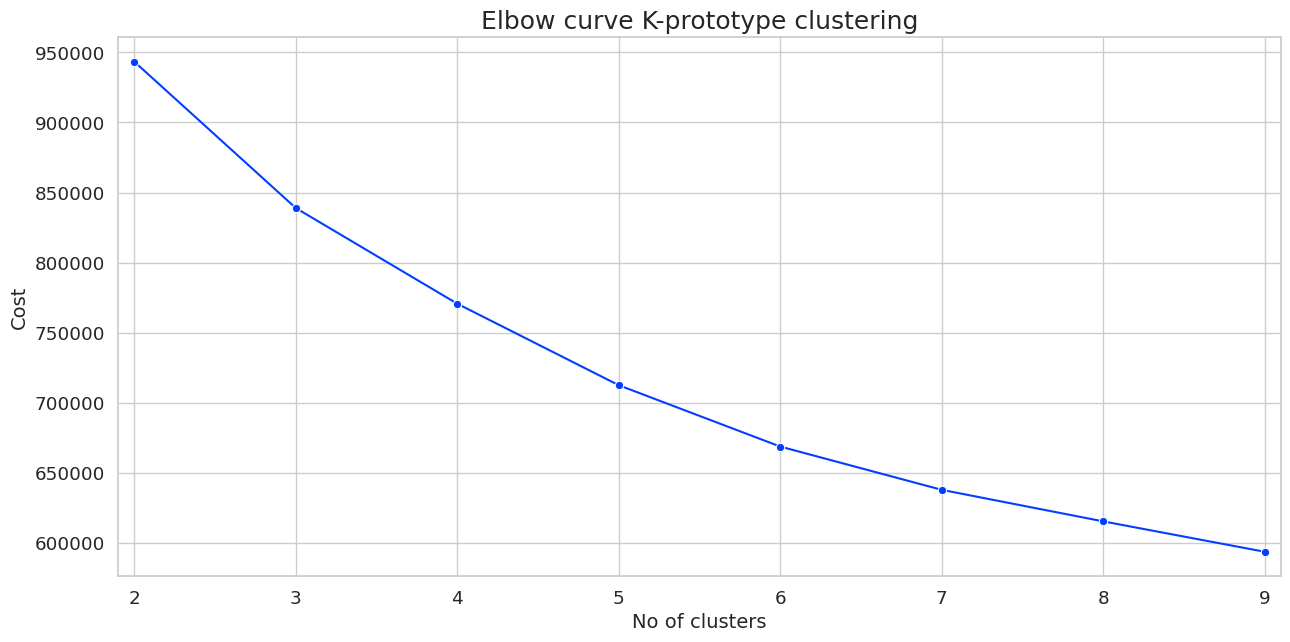

In [ ]:
# Function for plotting elbow curve for normal K-prototype
def plot_elbow_curve_kprot(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []

    for k in tqdm(no_of_clusters):
        test_model = KPrototypes(n_clusters=k, init='Cao', random_state=22, n_jobs=-1, verbose=2, n_init=10)
        test_model.fit_predict(kprot_data, categorical=cat_col)
        cost_values.append(test_model.cost_)
        kprot_clusters[f'cluster_labels_k_{k}'] = test_model.labels_


    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve K-prototype clustering', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();

    results_df = pd.DataFrame({
        'k': no_of_clusters,
        'cost': cost_values,
    })

    results_df.to_csv('kprototypes_costs.csv', index=False)
    files.download('kprototypes_costs.csv')


kprot_clusters = cluster_df.copy()
# Plotting elbow curve for k=2 to k=9
plot_elbow_curve_kprot(2,9,kprot_data)

In [ ]:
from google.colab import files
kprot_clusters.to_csv('kprot_clusters.csv', index=False)
files.download('kprot_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results_df.to_csv('kprototypes_costs.csv', index=False)
files.download('kprototypes_costs.csv')

NameError: name 'results_df' is not defined

  0%|          | 0/8 [00:00<?, ?it/s]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9


 12%|█▎        | 1/8 [24:33<2:51:55, 1473.60s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4


 25%|██▌       | 2/8 [1:00:13<3:06:31, 1865.25s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


 38%|███▊      | 3/8 [1:49:46<3:17:36, 2371.34s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


 50%|█████     | 4/8 [2:30:41<2:40:17, 2404.46s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10


 62%|██████▎   | 5/8 [3:17:32<2:07:32, 2550.93s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


 75%|███████▌  | 6/8 [4:05:34<1:28:47, 2663.53s/it]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10


 88%|████████▊ | 7/8 [4:58:02<47:01, 2821.77s/it]  

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


100%|██████████| 8/8 [5:55:32<00:00, 2666.53s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

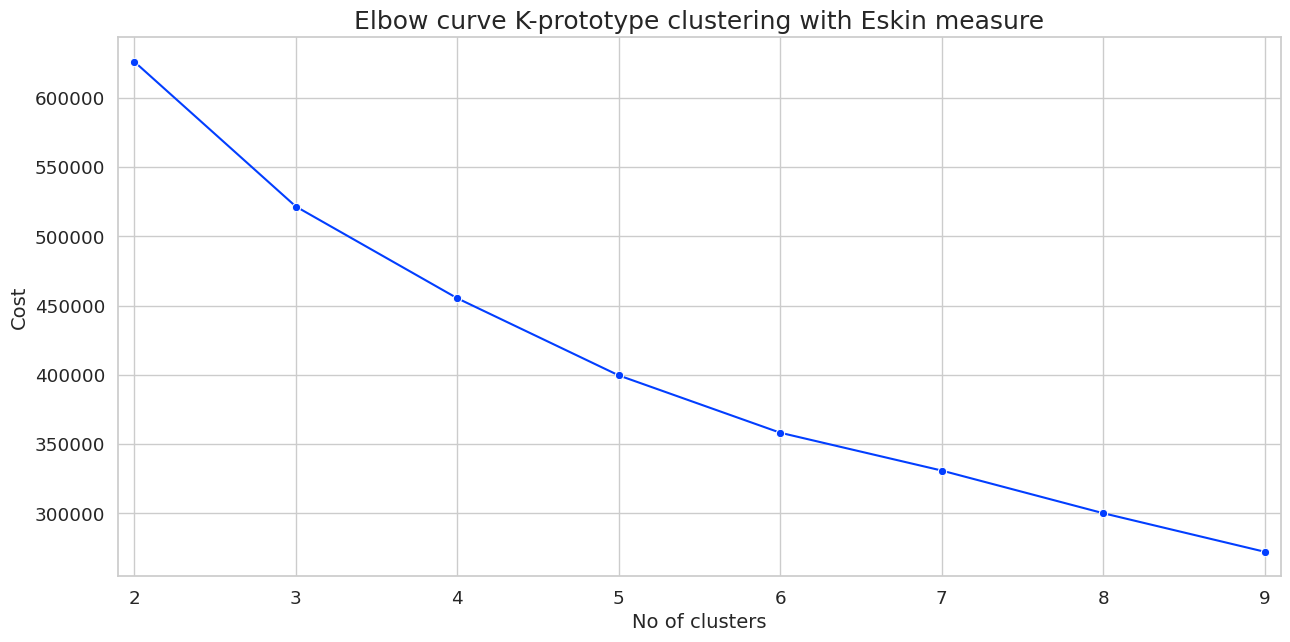

In [ ]:
# Function for plotting elbow curve for K-prototype with Eskin dissimilarity
def plot_elbow_curve_eskin(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []

    for k in tqdm(no_of_clusters):
        test_model = KPrototypes(n_clusters=k, cat_dissim = eskin_dissim_wrapper, init='Cao', random_state=22, n_jobs=-1, verbose=2, n_init=10)
        test_model.fit_predict(kprot_data, categorical=cat_col)
        cost_values.append(test_model.cost_)
        eskin_clusters[f'cluster_labels_k_{k}'] = test_model.labels_


    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve K-prototype clustering with Eskin measure', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();

    results_df = pd.DataFrame({
        'k': no_of_clusters,
        'cost': cost_values,
    })

    results_df.to_csv('eskin_costs.csv', index=False)
    files.download('eskin_costs.csv')


# Plotting elbow curve for k=2 to k=9
eskin_clusters = cluster_df.copy()
plot_elbow_curve_eskin(2,9,kprot_data)

In [ ]:
eskin_clusters.to_csv('eskin_clusters.csv', index=False)
files.download('eskin_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_3 = KPrototypes(n_clusters=3, cat_dissim = eskin_dissim_wrapper, init='Cao', random_state=22, n_jobs=-1, verbose=2, n_init=10)
clusters = model_3.fit_predict(kprot_data, categorical=cat_col)
print(model_3.cost_)
#new column for cluster labels associated with each subject
df['labels3'] = model_3.labels_
df['Cluster_id']=clusters
print(df['Cluster_id'].value_counts())
#pd.set_option('max_rows',None)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4
521606.54723060166
Cluster_id
0    74993
1    74673
2    73078
Name: count, dtype: int64


TypeError: agg function failed [how->median,dtype->object]

In [ ]:
kprot_data['labels3'] = model_3.labels_
kprot_data.groupby('labels3').agg(['median' ,'mean']).T

labels3                            0     1      2
sex                    median  2.000 2.000  2.000
                       mean    1.532 1.539  1.561
spanish                median  1.000 1.000  1.000
                       mean    1.032 1.064  1.046
mobility_issue         median  2.000 2.000  2.000
                       mean    1.975 1.986  1.943
main_activity_group    median  1.000 3.000  2.000
                       mean    1.984 2.389  1.836
prof_status_group      median  3.000 5.000  5.000
                       mean    3.266 3.584  3.722
driving_license_binary median  1.000 1.000  1.000
                       mean    0.732 0.578  0.683
educ_group             median  2.000 2.000  2.000
                       mean    2.452 2.263  2.381
transport_card_binary  median  1.000 1.000  1.000
                       mean    0.680 0.605  0.783
age_group              median  3.000 3.000  4.000
                       mean    2.773 2.380  3.413
electric.              median  0.000 0.000  0.000
                       mean    0.036 0.035  0.017
private_parking.       median  1.000 1.000  0.000
                       mean    0.703 0.660  0.490
pp_4age_hh             median -0.037 0.752 -0.919
                       mean    0.207 0.868 -1.100
vehicles_hh            median  0.577 0.577 -0.445
                       mean    0.344 0.327 -0.687
trips_hh               median -0.390 1.039 -0.390
                       mean   -0.519 0.984 -0.472
ppl_hh                 median -0.144 0.643 -1.007
                       mean    0.232 0.867 -1.124

In [ ]:
from google.colab import files
df.to_csv('cluster3_df.csv', index=False)
files.download('cluster3_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
kprot_data2 = kprot_data.drop(['labels3', 'Cluster_id'], axis=1)

In [ ]:
model_8 = KPrototypes(n_clusters=8, cat_dissim = eskin_dissim_wrapper, init='Cao', random_state=42, n_jobs=-1, verbose=2, gamma=0.25)
clusters = model_8.fit_predict(kprot_data2, categorical=cat_col)
print(model_8.cost_)
#new column for cluster labels associated with each subject
kprot_data['labels8'] = model_8.labels_
kprot_data['Cluster_id']=clusters
print(kprot_data['Cluster_id'].value_counts())
#pd.set_option('max_rows',None)
kprot_data['labels8'] = model_8.labels_
kprot_data.groupby('labels8').agg(['median' ,'mean']).T

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
308452.37629494147
Cluster_id
7    41847
2    33024
3    31568
1    26152
5    25755
6    24482
4    23495
0    16420
Name: count, dtype: int64


labels8                            0      1     2      3      4      5      6  \
sex                    median  2.000  2.000 2.000  2.000  2.000  2.000  2.000   
                       mean    1.538  1.519 1.534  1.513  1.626  1.546  1.520   
spanish                median  1.000  1.000 1.000  1.000  1.000  1.000  1.000   
                       mean    1.103  1.027 1.030  1.029  1.058  1.026  1.022   
mobility_issue         median  2.000  2.000 2.000  2.000  2.000  2.000  2.000   
                       mean    1.984  1.979 1.989  1.965  1.910  1.952  1.982   
main_activity_group    median  3.000  1.000 1.000  2.000  2.000  2.000  1.000   
                       mean    2.615  2.079 2.285  1.804  1.854  1.826  1.843   
prof_status_group      median  5.000  3.000 3.000  5.000  5.000  5.000  2.000   
                       mean    3.845  3.258 3.439  3.693  3.856  3.437  3.142   
driving_license_binary median  0.000  1.000 1.000  1.000  0.000  1.000  1.000   
                       mean    0.465  0.712 0.673  0.834  0.485  0.784  0.832   
educ_group             median  2.000  2.000 2.000  3.000  2.000  2.000  3.000   
                       mean    2.123  2.431 2.352  2.492  2.250  2.419  2.546   
transport_card_binary  median  1.000  1.000 1.000  1.000  1.000  1.000  1.000   
                       mean    0.619  0.679 0.538  0.730  0.858  0.733  0.574   
age_group              median  3.000  3.000 3.000  4.000  4.000  3.000  3.000   
                       mean    2.238  2.604 2.414  3.451  3.476  3.209  2.863   
pp_4age_hh             median  1.475  0.752 0.752 -0.919 -1.941 -0.919 -0.037   
                       mean    1.613  0.938 0.727 -0.989 -1.530 -0.563 -0.238   
vehicles_hh            median -0.445  0.577 0.577 -0.445 -1.837 -0.445  0.577   
                       mean   -0.006  0.642 0.987 -0.164 -1.469 -0.049  0.870   
trips_hh               median  1.305 -0.850 1.039 -0.033 -0.390 -1.486  0.256   
                       mean    1.241 -0.881 1.019  0.044 -0.731 -1.383  0.156   
ppl_hh                 median  1.375  0.643 0.643 -1.007 -1.981 -1.007 -0.144   
                       mean    1.621  0.883 0.712 -1.006 -1.565 -0.561 -0.098   
labels3                median  1.000  2.000 1.000  0.000  0.000  0.000  2.000   
                       mean    1.000  1.867 1.021  0.000  0.000  0.898  1.860   
Cluster_id             median  0.000  1.000 2.000  3.000  4.000  5.000  6.000   
                       mean    0.000  1.000 2.000  3.000  4.000  5.000  6.000   

labels8                            7  
sex                    median  2.000  
                       mean    1.560  
spanish                median  1.000  
                       mean    1.088  
mobility_issue         median  2.000  
                       mean    1.977  
main_activity_group    median  2.000  
                       mean    2.293  
prof_status_group      median  5.000  
                       mean    3.585  
driving_license_binary median  1.000  
                       mean    0.507  
educ_group             median  2.000  
                       mean    2.260  
transport_card_binary  median  1.000  
                       mean    0.754  
age_group              median  3.000  
                       mean    2.560  
pp_4age_hh             median -0.037  
                       mean    0.297  
vehicles_hh            median -0.445  
                       mean   -0.708  
trips_hh               median  0.256  
                       mean    0.396  
ppl_hh                 median  0.643  
                       mean    0.291  
labels3                median  1.000  
                       mean    1.363  
Cluster_id             median  7.000  
                       mean    7.000

In [ ]:
from google.colab import files
kprot_data.to_csv('cluster3_8_df.csv', index=False)
files.download('cluster3_8_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>